In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [15]:
features = pd.read_csv("../../data/temps.csv")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


数据表中
* year,moth,day,week分别表示的具体的时间
* temp_2：前天的最高温度值
* temp_1：昨天的最高温度值
* average：在历史中，每年这一天的平均最高温度值
* actual：这就是我们的标签值了，当天的真实最高温度
* friend：这一列可能是凑热闹的，你的朋友猜测的可能值

In [16]:
# 时间转换
from datetime import datetime

features["dates"] = features.apply(
  lambda x: datetime(x['year'], x['month'], x['day']),
  axis=1
)

In [17]:
features.head()


,year,month,day,week,temp_2,temp_1,average,actual,friend,dates
0,2016,1,1,Fri,45,45,45.6,45,29,2016-01-01
1,2016,1,2,Sat,44,45,45.7,44,61,2016-01-02
2,2016,1,3,Sun,45,44,45.8,41,56,2016-01-03
3,2016,1,4,Mon,44,41,45.9,40,53,2016-01-04
4,2016,1,5,Tues,41,40,46.0,44,41,2016-01-05


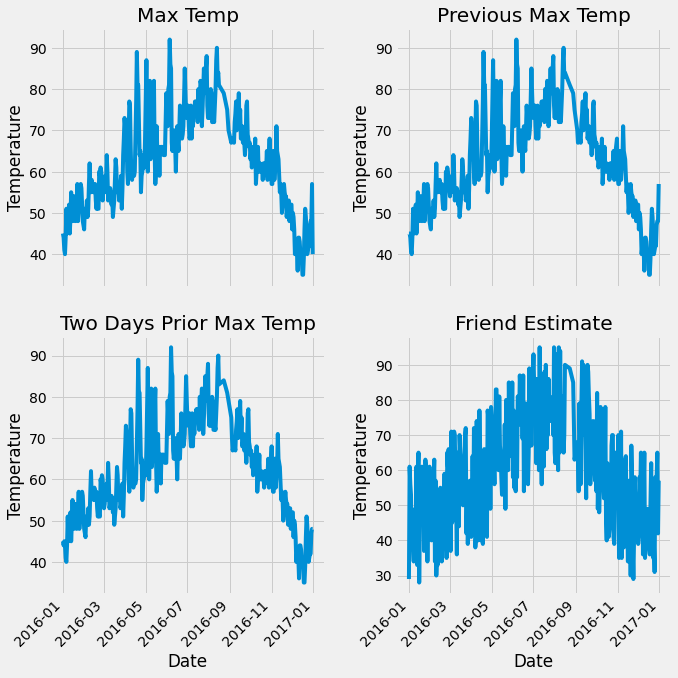

In [18]:
# 准备画图
# 指定默认风格
plt.style.use("fivethirtyeight")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.autofmt_xdate(rotation=45)

# 标签值
ax1.plot(features["dates"], features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(features["dates"], features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(features["dates"], features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 我的逗逼朋友
ax4.plot(features["dates"], features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)


In [19]:
# 独热编码
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,dates,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,2016-01-01,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,2016-01-02,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,2016-01-03,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,2016-01-04,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,2016-01-05,0,0,0,0,0,1,0


In [20]:
features

,year,month,day,temp_2,temp_1,average,actual,friend,dates,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,2016-01-01,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,2016-01-02,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,2016-01-03,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,2016-01-04,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,2016-01-05,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,47,2016-12-27,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,58,2016-12-28,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,65,2016-12-29,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,42,2016-12-30,1,0,0,0,0,0,0


In [ ]:
print('数据维度:', features.shape)

In [21]:
# 标签
labels = np.array(features['actual'])

# 时间
dates = np.array(features['dates'])

# 在特征中去掉标签
features= features.drop('actual', axis = 1)

# 在特征中去掉时间
features= features.drop('dates', axis = 1)

# 名字单独保存一下，以备后患
feature_list = list(features.columns)

# 转换成合适的格式
features = np.array(features)

In [22]:
features.shape

(348, 14)

In [23]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [24]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

# 构建网络模型

In [26]:
x = torch.tensor(input_features, dtype=torch.float64)
y = torch.tensor(labels, dtype=torch.float64)

# 权重参数初始化
weights = torch.randn((14, 128), dtype=torch.float64, requires_grad=True)
biases = torch.randn(128, dtype=torch.float64, requires_grad=True)
weights2 = torch.randn((128, 1), dtype=torch.float64, requires_grad=True)
biases2 = torch.randn(1, dtype=torch.float64, requires_grad=True)

learning_rate = 0.001
losses = []

for i in range(1000):
    # 计算隐层
    hidden = x.mm(weights) + biases
    # 加入激活函数
    hidden = torch.relu(hidden)
    # 预测结果
    predictions = hidden.mm(weights2) + biases2
    # 计算损失
    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())

    # 查看损失
    if i % 100 == 0:
        print(f'loss: {loss}')
    # 反向传播计算
    loss.backward()

    # 更新参数
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    biases2.data.add_(- learning_rate * biases2.grad.data)

    # 清空梯度
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    biases2.grad.data.zero_()



loss: 4527.811755775796
loss: 152.01774036627958
loss: 145.59565987841975
loss: 143.586649999282
loss: 142.54674847534562
loss: 141.87694742596395
loss: 141.40252352902516
loss: 141.0462188846092
loss: 140.77332792689853
loss: 140.55776732041429


In [27]:
predictions.shape

torch.Size([348, 1])

# 更简单的构建网络模型

In [28]:
input_size = input_features.shape[1]
hidden_size = 128
output_size = 1
batch_size = 16
my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)
cost = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(my_nn.parameters(), lr=0.001)

In [31]:
# 训练网络
losses = []
for i in range(1000):
    batch_loss = []
    # MINI-Batch 方法来进行训练
    for start in range(0, input_length := len(input_features), batch_size):
        end = start + batch_size if start + batch_size < input_length else input_length
        xx = torch.tensor(input_features[start: end], dtype=torch.float, requires_grad=True)
        yy = torch.tensor(labels[start: end], dtype=torch.float, requires_grad=True)
        prediction = my_nn(xx)
        loss = cost(prediction, yy)
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())

    if i % 100 == 0:
        batch_loss_mean = np.mean(batch_loss)
        losses.append(batch_loss_mean)
        print(i, batch_loss_mean)

0 3997.958
100 37.990707
200 35.678776
300 35.28656
400 35.10839
500 34.97366
600 34.855747
700 34.738987
800 34.617435
900 34.490192


# 查看训练结果

In [32]:
x = torch.tensor(input_features, dtype=torch.float)
predict = my_nn(x).data.numpy()

In [35]:
# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# 创建一个表格来存日期和模型预测值
predict_data = pd.DataFrame(data = {'date': dates, 'prediction': predict.reshape(-1)})

Text(0.5, 1.0, 'Actual and Prediction Values')

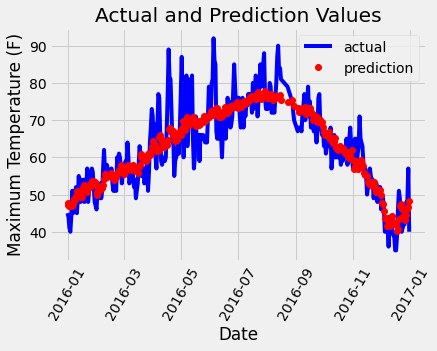

In [39]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# 预测值
plt.plot(predict_data['date'], predict_data['prediction'], 'ro', label='prediction')
plt.xticks(rotation='60')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (F)')
plt.title('Actual and Prediction Values')